## Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import mean_absolute_error
import time



## Read Datasets

Reading audit dataset

In [2]:
audit_risk_data = pd.read_csv("audit_data/audit_risk.csv")
audit_risk_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [3]:
audit_risk_data.shape

(776, 27)

In [4]:
audit_risk_data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

Check whether there is null value or not

In [5]:
audit_risk_data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

According to this result, there is null value in dataset. 

In [6]:
print("Mode: {}".format(audit_risk_data.Money_Value.mode()))
print("Mean: {}".format(audit_risk_data.Money_Value.mean()))
print("Median: {}".format(audit_risk_data.Money_Value.median()))

Mode: 0    0.0
Name: Money_Value, dtype: float64
Mean: 14.137630967741934
Median: 0.09


Fill the null value with mean.

In [7]:
audit_risk_data['Money_Value'] = audit_risk_data['Money_Value'].fillna(audit_risk_data.Money_Value.mean())


Check if there is a still null value or not

In [8]:
audit_risk_data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

There is no longer null values

Check the data type:

In [9]:
audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     776 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

When converthing LOCATION_ID column type from object to integer using this: audit_risk_data['LOCATION_ID'] = audit_risk_data['LOCATION_ID'].astype(int), an error occurred. 
The error says "invalid literal for int() with base 10: 'LOHARU' ". 


Check the value counts in LOCATION_ID columns

In [10]:
counts = audit_risk_data['LOCATION_ID'].value_counts()
print(counts)

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
28          8
21          8
27          8
43          7
25          6
20          5
7           4
30          4
38          4
36          4
3           3
40          3
35          2
44          1
NUH         1
LOHARU      1
SAFIDON     1
23          1
42          1
41          1
34          1
33          1
24          1
17          1
Name: LOCATION_ID, dtype: int64


According to this, there are some string value in this column. 
To handle this, first, find only the indices of non-integer values. 
Then, calculate the mean of the "LOCATION_ID" column in the dataset named "numeric_df" 
and replaces the "LOCATION_ID" values contained in the rows in the "non_numeric_indices" list with this mean value. 
And, finally, control the number of the indices of non-integer values which should be empty.

In [11]:
# select just LOCATION_ID column
location_id = audit_risk_data["LOCATION_ID"]

# a function to convert values to integer
def str_to_int(val):
    try:
        int(val)
        return False
    except ValueError:
        return True

#find only the indices of non-integer values. 
non_numeric_indices = [i for i, val in location_id.items() if str_to_int(val)]

print(f"There are {len(non_numeric_indices)} non-numerical values. Indexes: {non_numeric_indices}")


numeric_df = audit_risk_data.copy()
numeric_df = numeric_df.drop(non_numeric_indices)
numeric_df["LOCATION_ID"] = pd.to_numeric(numeric_df["LOCATION_ID"])

mean_location_id = numeric_df["LOCATION_ID"].mean()
audit_risk_data.loc[non_numeric_indices, "LOCATION_ID"] = mean_location_id


#find only the indices of non-integer values. 
non_numeric_indices = [i for i, val in location_id.items() if str_to_int(val)]

print("After replacing the LOCATION_ID values contained in the rows in the non_numeric_indices list with this mean value:")
print(f"There are {len(non_numeric_indices)} non-numerical values. Indexes: {non_numeric_indices}")




There are 3 non-numerical values. Indexes: [351, 355, 367]
After replacing the LOCATION_ID values contained in the rows in the non_numeric_indices list with this mean value:
There are 0 non-numerical values. Indexes: []


Change data type of LOCATION_ID from object to numeric

In [12]:

audit_risk_data['LOCATION_ID'] = pd.to_numeric(audit_risk_data['LOCATION_ID'], errors='coerce')


Check the data type:

In [13]:
audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    float64
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     776 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

As you can see, LOCATION_ID is no longer an object.

In [14]:
audit_risk_data.describe()


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,14.856404,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,9.872154,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,1.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,8.000000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,13.000000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,19.000000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,44.000000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


Reading bike sharing dataset 

In [15]:
day_data = pd.read_csv("Bike-Sharing-Dataset/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
day_data.shape

(731, 16)

In [17]:
day_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Check whether there is null value or not

In [18]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


I chose to drop this column because it is a object type and in the dataset there are information about year and month.

In [20]:

day_data = day_data.drop("dteday", axis = 1)


Drop this column because it is a record directory.

In [21]:
day_data = day_data.drop("instant", axis = 1)


In [22]:
day_data.shape

(731, 14)

In [23]:
day_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [24]:
# Print Confsion Matrix

def ViewConfusionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams["figure.figsize"] = [12,9]
    skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    plt.show()

In [25]:
# Print Accuracy 

def ViewAccuracy(y_test, y_pred):
    print("Accuracy : %",accuracy_score(y_test, y_pred) * 100)

In [26]:
# Print Mean Squared Error 

def ViewMeanSquaredError(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error: {:.2f}".format(mse))

In [27]:
# Print Mean Absolute Error

def ViewMeanAbsoluteError(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error: {:.2f}".format(mae))

In [28]:
# Report perfomance

def ReportPerformance(y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(report)

In [29]:
#Find Best Threshold

def find_best_threshold(y_true, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# View Roc Curve
def ViewRocCurve(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC')
    plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()

    best_threshold = find_best_threshold(y_test, y_pred)
    print("Best threshold : \n",best_threshold,"\n")


## Part 1

KNN Classifier

In [30]:
class KNNClassifier:
    
    def __init__(self, k=4):
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def euclidean_distance(self, x1, x2):
        distance = 0
        for i in range(len(x1)):
            distance += (x1[i] - x2[i]) ** 2
        return math.sqrt(distance)
    
    def get_neighbors(self, test_instance):
        distances = []
        for i in range(len(self.X_train)):
            dist = self.euclidean_distance(test_instance, self.X_train[i])
            distances.append((i, dist))
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors
    
    def predict(self, X_test):
        y_pred = []
        for test_instance in X_test:
            neighbors = self.get_neighbors(test_instance)
            classes = {}
            for index in neighbors:
                if self.y_train[index] in classes:
                    classes[self.y_train[index]] += 1
                else:
                    classes[self.y_train[index]] = 1
            predicted_class = max(classes, key=classes.get)
            y_pred.append(predicted_class)
        return y_pred
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       471
           1       0.99      0.92      0.96       305

    accuracy                           0.97       776
   macro avg       0.97      0.96      0.97       776
weighted avg       0.97      0.97      0.97       776

Accuracy : % 96.77835051546391


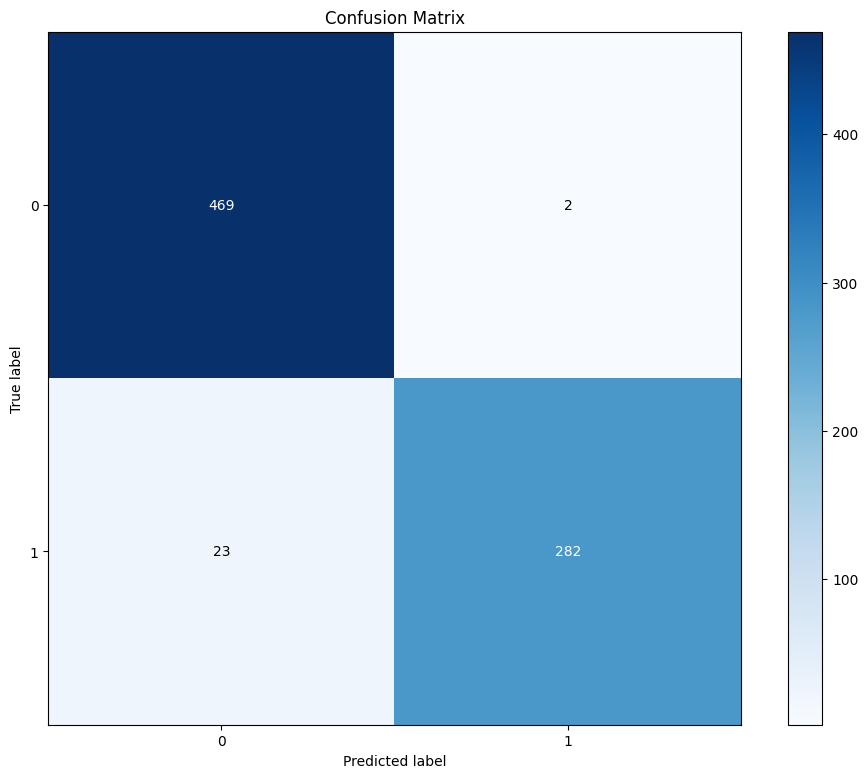

Run Time Performance = 10.744776248931885 seconds


In [31]:
start = time.time()
dataset = audit_risk_data.copy()

X = dataset.drop("Risk", axis = 1)
y = dataset['Risk']


# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)
total_y_test = []
total_y_pred = []

for tr, te in kf.split(dataset):        
    
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]

    # Convert X_train and y_train to NumPy arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to a NumPy array
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    knn = KNNClassifier(k=4)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)
    
    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()
    
total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)

ReportPerformance(total_y_test, total_y_pred)
ViewAccuracy(total_y_test, total_y_pred)
ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))

end = time.time()
print(f"Run Time Performance = {end - start} seconds")



## Part 2

KNN Regressor

In [32]:
class KNNRegressor:
    def __init__(self, k=4):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def manhattan_distance(self, x1, x2):
        distance = 0
        for i in range(len(x1)):
            distance += np.abs(x1[i] - x2[i])
   
        return distance

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            distances = []
            for j in range(self.X_train.shape[0]):
                dist = self.manhattan_distance(X[i], self.X_train[j])
                distances.append((dist, self.y_train[j]))
            distances.sort()
            neighbors = distances[:self.k]
            pred = np.mean([neighbor[1] for neighbor in neighbors])
            y_pred.append(pred)
        return np.array(y_pred)


In [33]:
start = time.time()

dataset = day_data.copy()

X = dataset.drop("cnt", axis = 1)
y = dataset['cnt']


# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)
total_y_test = []
total_y_pred = []


for tr, te in kf.split(dataset):        
    
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]

    # Convert X_train and y_train to NumPy arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    # Convert X_test and y_test to a NumPy array
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    knn = KNNRegressor(k=4)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)


    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)
    
    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()
    
total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)


ViewMeanAbsoluteError(total_y_test, total_y_pred)

end = time.time()
print(f"Run Time Performance = {end - start} seconds")



Mean Absolute Error: 54.03
Run Time Performance = 11.118610382080078 seconds


## Part 3

SVM Classifer (Linear)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       471
           1       1.00      0.98      0.99       305

    accuracy                           0.99       776
   macro avg       0.99      0.99      0.99       776
weighted avg       0.99      0.99      0.99       776

Accuracy : % 99.22680412371135


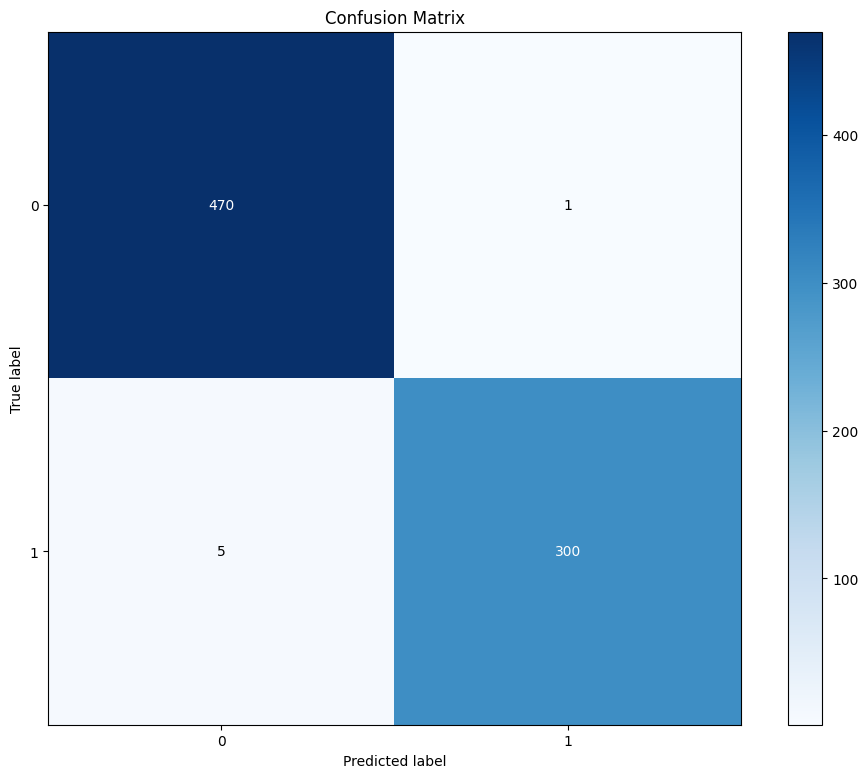

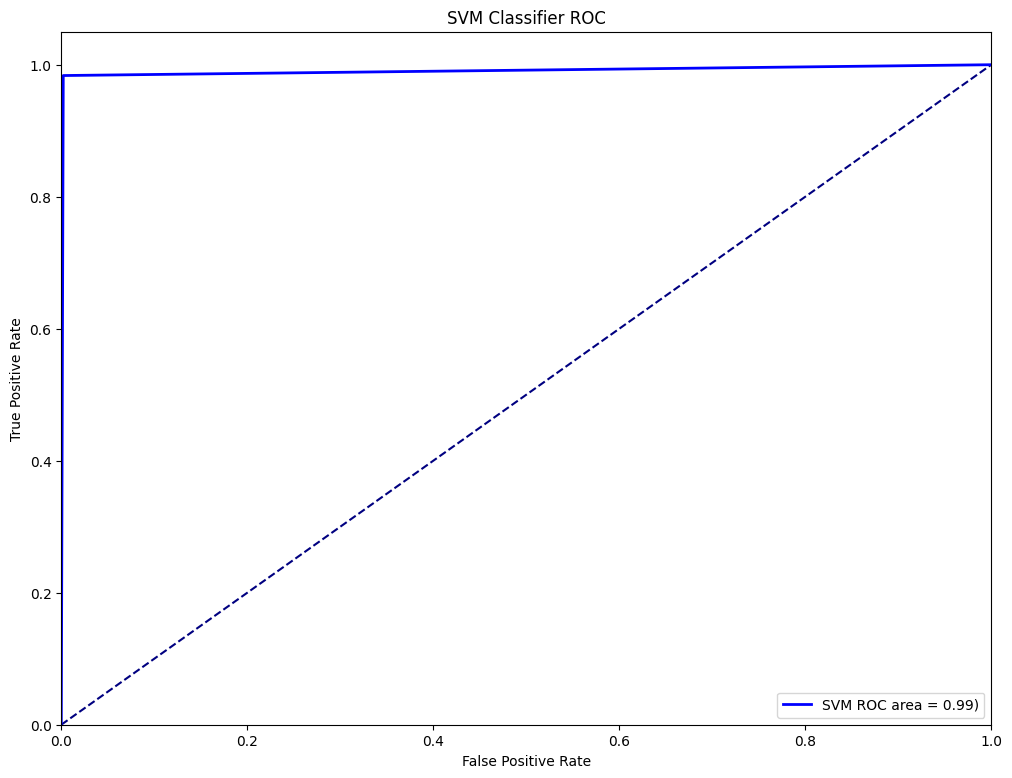

Best threshold : 
 1 

Run Time Performance = 0.5273785591125488 seconds


In [34]:
start = time.time()

dataset = audit_risk_data.copy()

X = dataset.drop("Risk", axis = 1)
y = dataset['Risk']


# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)
total_y_test = []
total_y_pred = []

for tr, te in kf.split(dataset):        
    
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]


    svclassifier = SVC(kernel='linear',gamma='scale')  
    svclassifier.fit(x_train, y_train) 
    y_pred = svclassifier.predict(x_test)

    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)
    
    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()
    
total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)

ReportPerformance(total_y_test, total_y_pred)
ViewAccuracy(total_y_test, total_y_pred)
ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))
ViewRocCurve(total_y_test, total_y_pred)

end = time.time()
print(f"Run Time Performance = {end - start} seconds")


## Part 4

SVM Regressor

In [35]:
start = time.time()

dataset = day_data.copy()


X = dataset.drop('cnt', axis=1)
y = dataset['cnt']

# Define the number of folds for cross-validation
n_folds = 6


svm_regressor = SVR(kernel='linear')

# Initialize the cross-validation object
kf = KFold(n_splits=n_folds, shuffle=True)


mse_scores = np.zeros(n_folds)
r2_scores = np.zeros(n_folds)

# Perform k-fold cross-validation
fold = 0
for train_idx, test_idx in kf.split(dataset):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    svm_regressor.fit(X_train, y_train)
    y_pred = svm_regressor.predict(X_test)
    
 
    mse_scores[fold] = mean_squared_error(y_test, y_pred)
    r2_scores[fold] = svm_regressor.score(X_test, y_test)

    fold += 1

# Print the cross-validation results
print('Mean MSE score: ', mse_scores.mean())
print('Mean R2 score: ', r2_scores.mean())

end = time.time()
print(f"Run Time Performance = {end - start} seconds")


Mean MSE score:  0.004474998613150794
Mean R2 score:  0.9999999987953724
Run Time Performance = 0.418015718460083 seconds


## Part 5

SVM Classifier (Polynomial)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       471
           1       1.00      0.37      0.54       305

    accuracy                           0.75       776
   macro avg       0.85      0.68      0.68       776
weighted avg       0.82      0.75      0.71       776

Accuracy : % 75.12886597938144


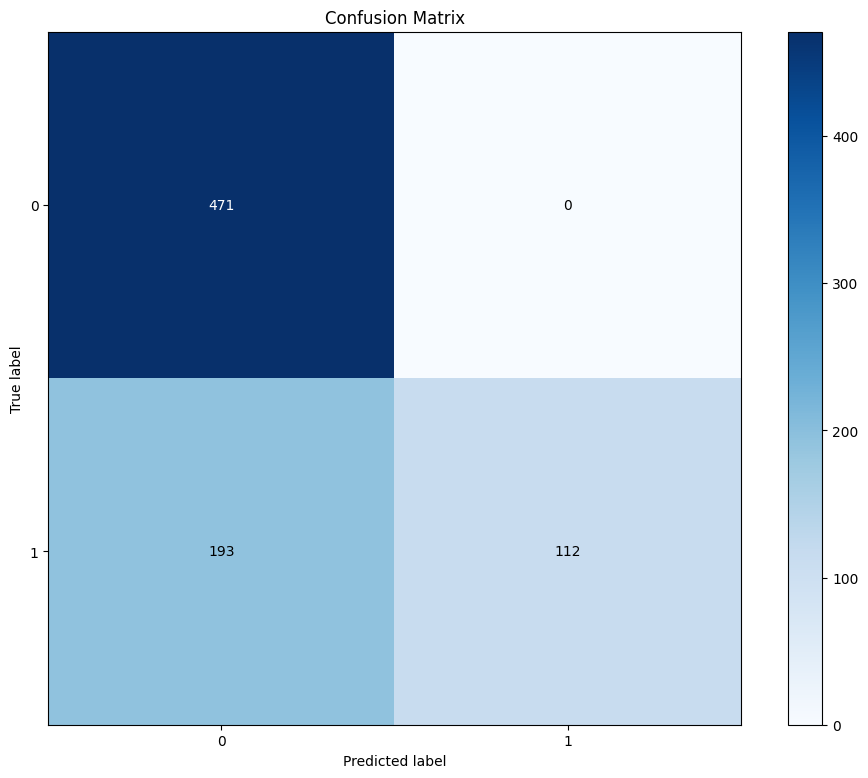

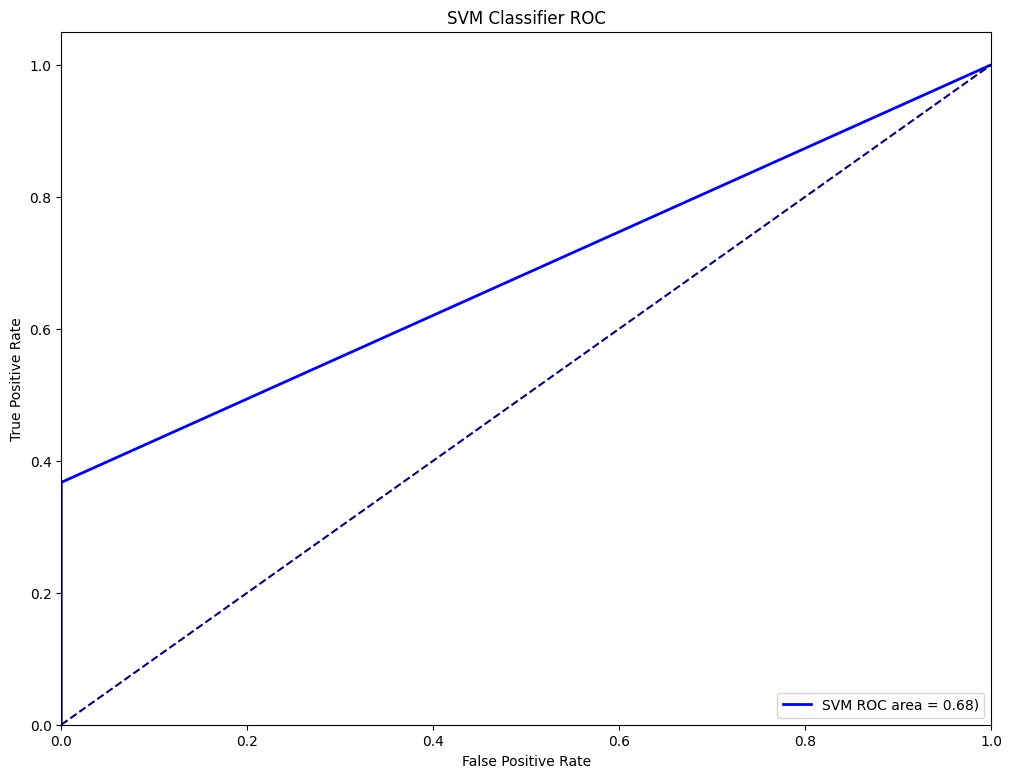

Best threshold : 
 1 

Run Time Performance = 0.5225105285644531 seconds


In [36]:
start = time.time()

dataset = audit_risk_data.copy()

X = dataset.drop("Risk", axis = 1)
y = dataset['Risk']

# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)
total_y_test = []
total_y_pred = []

for tr, te in kf.split(dataset):        
    
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]
    
    svclassifier = SVC(kernel='poly',gamma='scale')  
    svclassifier.fit(x_train, y_train) 
    y_pred = svclassifier.predict(x_test)  

    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)
    
    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()
    
total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)


ReportPerformance(total_y_test, total_y_pred)
ViewAccuracy(total_y_test, total_y_pred)
ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))
ViewRocCurve(total_y_test, total_y_pred)

end = time.time()
print(f"Run Time Performance = {end - start} seconds")



## Part 6

Decision Tree Classifier

In [37]:
def tree_to_rules(tree, feature_names):
    rules = []

    def traverse(node, rule):
        if tree.tree_.feature[node] != tree.tree_.threshold[node]:
            # if not a leaf node, continue traversing
            feature = feature_names[tree.tree_.feature[node]]
            threshold = tree.tree_.threshold[node]
            rule.append(f"{feature} <= {threshold:.3f}")
            traverse(tree.tree_.children_left[node], rule)
            rule.pop()
            rule.append(f"{feature} > {threshold:.3f}")
            traverse(tree.tree_.children_right[node], rule)
            rule.pop()
        else:
            # if leaf node, add rule to the list
            rule.append(f"class {np.argmax(tree.tree_.value[node])}")
            rules.append(" AND ".join(rule))
            rule.pop()

    traverse(0, [])
    return rules


Decision Tree Classifer with Pre-Pruning

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00       305

    accuracy                           1.00       776
   macro avg       1.00      1.00      1.00       776
weighted avg       1.00      1.00      1.00       776

Accuracy : % 100.0


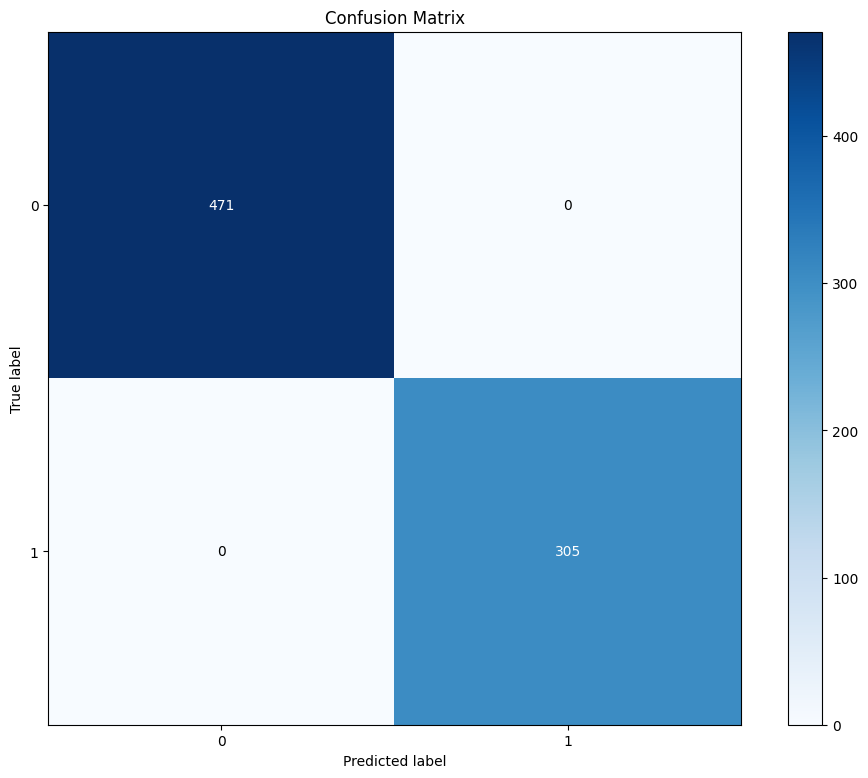

Decision tree into a set of rules
['Audit_Risk <= 1.005 AND class 0', 'Audit_Risk > 1.005 AND class 1']
Run Time Performance = 0.292752742767334 seconds


In [38]:
start = time.time()

dataset = audit_risk_data.copy()

X = dataset.drop("Risk", axis = 1)
y = dataset['Risk']


# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)


total_y_test = []
total_y_pred = []

clf = tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=50, min_samples_leaf=1, max_depth=10)       
    
for tr, te in kf.split(dataset):
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]

    # predicate
    # different pruning parameters
    # pre-pruning
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=50, min_samples_leaf=1, max_depth=10)    
    clf.fit(x_train, y_train)    
    y_pred = clf.predict(x_test)  
    
    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)
    
    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()

total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)

ReportPerformance(total_y_test, total_y_pred)
ViewAccuracy(total_y_test, total_y_pred)
ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))
print("Decision tree into a set of rules")
rules = tree_to_rules(clf,X.columns.tolist())
print(rules)

end = time.time()
print(f"Run Time Performance = {end - start} seconds")



Decision Tree Classifer with Post-Pruning

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       471
           1       1.00      1.00      1.00       305

    accuracy                           1.00       776
   macro avg       1.00      1.00      1.00       776
weighted avg       1.00      1.00      1.00       776

Accuracy : % 100.0


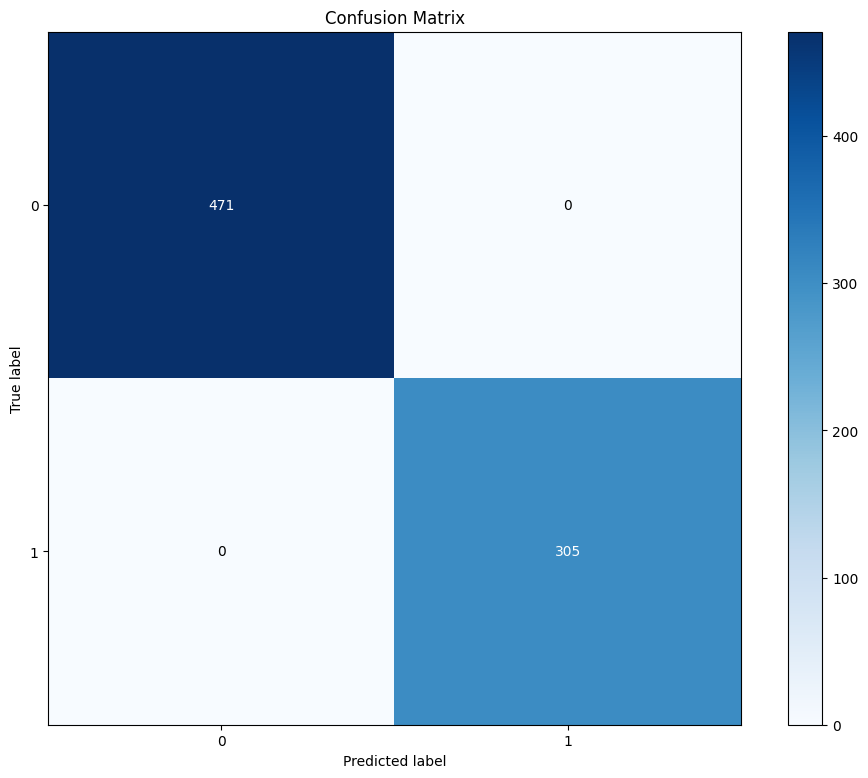

Decision tree into a set of rules
['Audit_Risk <= 1.005 AND class 0', 'Audit_Risk > 1.005 AND class 1']
Run Time Performance = 0.33014965057373047 seconds


In [39]:
start = time.time()

dataset = audit_risk_data.copy()

X = dataset.drop("Risk", axis = 1)
y = dataset['Risk']


# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)


total_y_test = []
total_y_pred = []

clf = tree.DecisionTreeClassifier(criterion='entropy')

for tr, te in kf.split(dataset):
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]
    
    
    clf = tree.DecisionTreeClassifier(criterion='entropy')
    # Prune the decision tree
    path = clf.cost_complexity_pruning_path(x_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities


    # Find the best ccp_alpha
    best_ccp_alpha = None
    best_score = 0.0
    for ccp_alpha in ccp_alphas:
        clf = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha)
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        if score > best_score:
            best_score = score
            best_ccp_alpha = ccp_alpha

    
    # Prune the decision tree with the best ccp_alpha
    clf = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=best_ccp_alpha)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)  
    
    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)
    
    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()

total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)


ReportPerformance(total_y_test, total_y_pred)
ViewAccuracy(total_y_test, total_y_pred)
ViewConfusionMatrix(total_y_test.astype(int), total_y_pred.astype(int))

print("Decision tree into a set of rules")
rules = tree_to_rules(clf,X.columns.tolist())
print(rules)

end = time.time()
print(f"Run Time Performance = {end - start} seconds")


## Part 7

Decision Tree Regressor

In [40]:
start = time.time()

dataset = day_data.copy()


X = dataset.drop("cnt", axis = 1)
y = dataset['cnt']


# define the number of folds for k-fold cross-validation
n_splits = 6  # number of folds for k-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True)


mse_scores_ = np.zeros(n_splits)
r2_scores_ = np.zeros(n_splits)

fold = 0

total_y_test = []
total_y_pred = []

dt_regressor = tree.DecisionTreeRegressor(max_depth=10)   

for tr, te in kf.split(dataset):
    x_train, x_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]

        
  
    dt_regressor = tree.DecisionTreeRegressor(max_depth=10)  
    dt_regressor.fit(x_train, y_train) 
    y_pred = dt_regressor.predict(x_test)  

    
    # Convert y_pred to a NumPy array  
    y_pred = np.array(y_pred)


    total_y_test += y_test.tolist()
    total_y_pred += y_pred.tolist()
    

    # Compute the mean squared error and R2 score
    mse_scores_[fold] = mean_squared_error(y_test, y_pred)
    r2_scores_[fold] = dt_regressor.score(x_test, y_test)
      
    fold += 1


total_y_test = np.array(total_y_test)
total_y_pred = np.array(total_y_pred)

print('Mean MSE score: ', mse_scores_.mean())
print('Mean R2 score: ', r2_scores_.mean())


print("Decision tree into a set of rules")
rules = tree_to_rules(dt_regressor,X.columns.tolist())
print(rules)

end = time.time()
print(f"Run Time Performance = {end - start} seconds")

Mean MSE score:  42987.91779201106
Mean R2 score:  0.9885141826120455
Decision tree into a set of rules
['registered <= 3173.000 AND registered <= 2111.500 AND registered <= 1342.000 AND registered <= 885.000 AND casual <= 115.500 AND registered <= 226.000 AND class 0', 'registered <= 3173.000 AND registered <= 2111.500 AND registered <= 1342.000 AND registered <= 885.000 AND casual <= 115.500 AND registered > 226.000 AND registered <= 481.500 AND mnth <= 6.500 AND class 0', 'registered <= 3173.000 AND registered <= 2111.500 AND registered <= 1342.000 AND registered <= 885.000 AND casual <= 115.500 AND registered > 226.000 AND registered <= 481.500 AND mnth > 6.500 AND class 0', 'registered <= 3173.000 AND registered <= 2111.500 AND registered <= 1342.000 AND registered <= 885.000 AND casual <= 115.500 AND registered > 226.000 AND registered > 481.500 AND registered <= 616.000 AND registered <= 530.500 AND class 0', 'registered <= 3173.000 AND registered <= 2111.500 AND registered <= 1